# This will be the main file for the final
    -Feel free to add more functions to the first block as well as make other files

In [52]:
#Import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Improt the CSV and make the chonky dataframe
data = pd.concat([pd.read_csv('data/phs_2020_1.csv'),pd.read_csv('data/phs_2020_2.csv')])
del data["start_time"]
del data["esports_match_id"]

#Make some useful functions and variables
allPlayers = data["player_name"].unique()
allStats = data["stat_name"].unique()
heroNames = data["hero_name"].unique()
teamNames = data["team_name"].unique()
tankHeros = ["D.Va","Orisa","Reinhardt","Roadhog", "Sigma", "Winston", "Wrecking Ball", "Zarya"]
dpsHeros = ["Ashe","Bastion","Doomfist","Echo","Genji","Hanzo","Junkrat","McCree","Mei","Pharah","Reaper","Soldier: 76","Sombra","Symmetra","Torbjörn","Tracer","Widowmaker"]
supportHeros = ["Ana","Baptiste","Brigitte","Lúcio","Mercy","Moira","Zenyatta"]
#These stats are total stats, so they need to be adjusted with time (getPlayerData function does this automatically)
importantTotalStats = ["All Damage Done", "Damage Taken", "Deaths", "Final Blows", "Objective Kills", "Healing Done"]

#Returns a dataframe with the important stats for a specific player with respect to time
#Note that certian stats are tracked oddly in the dataset (i.e Hog Heal is not attributed to Healing Recieved) so be aware of that
def getPlayerData(playerName):
    playerFrame = data[data.player_name == playerName]
    returnFrame = pd.DataFrame(index=playerFrame["hero_name"].unique())
    timeFrame = playerFrame[playerFrame.stat_name == "Time Played"]  
    timeFrame = timeFrame.groupby(timeFrame["hero_name"]).sum()
    #Converts to per 10 min instead of per second
    timeFrame = timeFrame / 600
    for stat in importantTotalStats:
        tempFrame = playerFrame[playerFrame.stat_name == stat]  
        tempFrame = tempFrame.groupby(tempFrame["hero_name"]).sum()
        tempFrame = tempFrame / timeFrame
        returnFrame[stat] = tempFrame["stat_amount"]
    returnFrame = returnFrame.dropna(how='all')
    return returnFrame.fillna(0)
def totalHeroTime():
    timeFrame = data[data.stat_name == "Time Played"]  
    timeFrame = timeFrame.groupby(timeFrame["hero_name"]).sum()
    return timeFrame
def getTeamStat(teamName, statName):
    teamStat = data[data.team_name == teamName]
    teamStat = teamStat[teamStat.hero_name == "All Heroes"]
    teamStat = teamStat.dropna()
    timeStat = teamStat[teamStat.stat_name == "Time Played"]
    timeStat = timeStat.groupby(timeStat["player_name"]).sum()
    timeStat = timeStat / 600
    teamStat = teamStat[teamStat.stat_name == statName]
    teamStat = teamStat.groupby(teamStat["player_name"]).sum()
    teamStat = teamStat / timeStat
    return pd.DataFrame(data = teamStat.mean()[0] ,columns = [statName], index = [teamName])

In [3]:
#Make a List containing dataFrames of each player's important stats
adjustedData = {}
for player in allPlayers:
    adjustedData[player] = getPlayerData(player)
#To show a specific player, do   adjustedData['Rascal']

## Top 10 players with the highest stats per 10 minutes ##

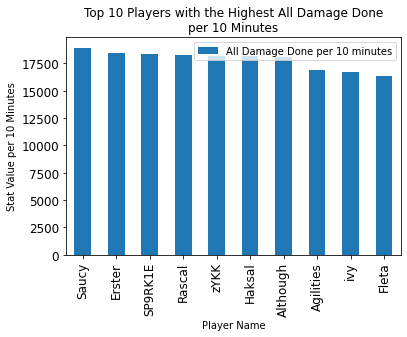

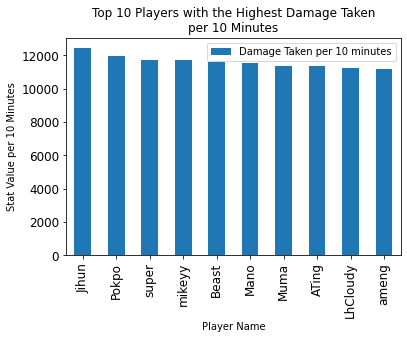

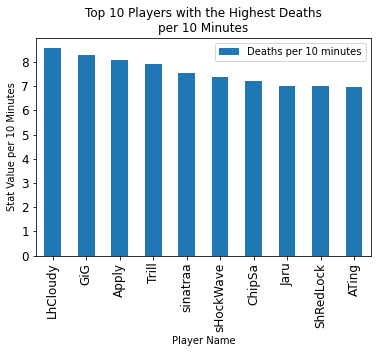

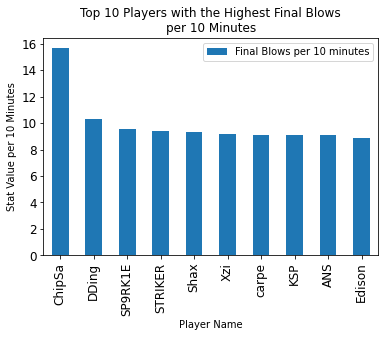

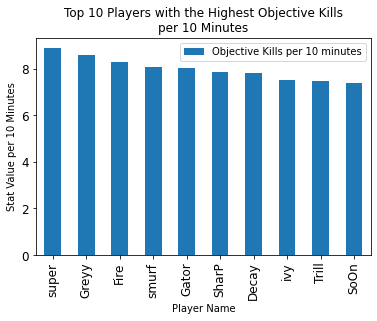

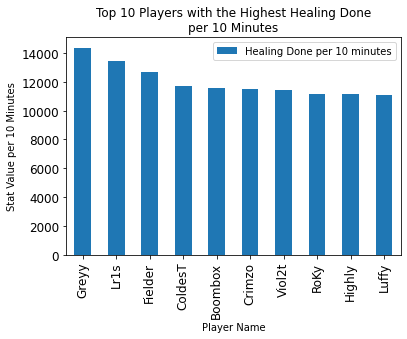

In [4]:
#Create a graph for each stat showing the top 10 players with that specific stat
for stat in importantTotalStats:
    statValues = {}
    for player in allPlayers:
        statValues[player] = adjustedData[player].loc[["All Heroes"]][stat].values.item()
    statFrame = pd.DataFrame.from_dict(statValues, orient = 'index', columns = [stat + " per 10 minutes"])
    statFrame = statFrame.sort_values(by=[stat + " per 10 minutes"], ascending = False)
    statFrame = statFrame.iloc[0:10]
    statFrame.plot(kind='bar', xlabel = "Player Name", ylabel = "Stat Value per 10 Minutes", title = "Top 10 Players with the Highest " + stat + "\nper 10 Minutes", fontsize = 12)

## Top 5 Heros in each role ##

<AxesSubplot:title={'center':'Top 5 most played tank heros'}, xlabel='Hero Name', ylabel='Time played in seconds'>

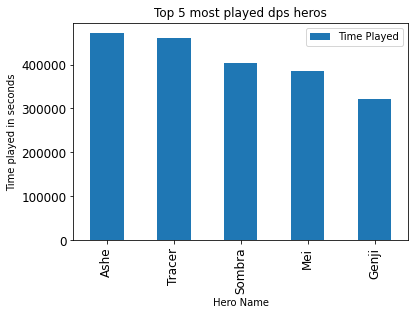

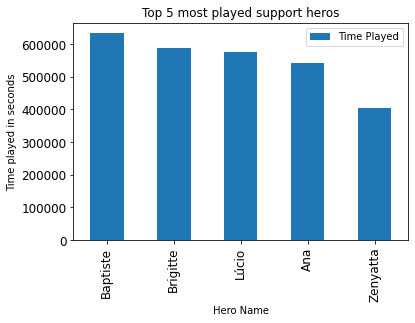

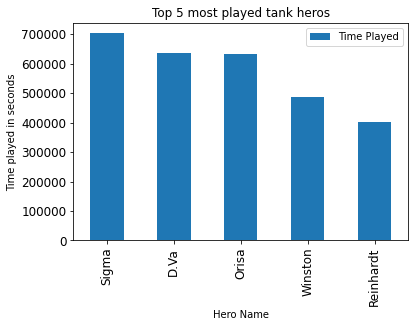

In [50]:
df = totalHeroTime()
dpsHeroTime = df.reindex(dpsHeros, axis=0)
supportHeroTime = df.reindex(supportHeros, axis=0)
tankHeroTime = df.reindex(tankHeros, axis=0)
dpsHeroTime.rename(columns={"stat_amount":"Time Played"}, inplace = True)
supportHeroTime.rename(columns={"stat_amount":"Time Played"}, inplace = True)
tankHeroTime.rename(columns={"stat_amount":"Time Played"}, inplace = True)
dpsHeroTime = dpsHeroTime.sort_values(by=["Time Played"], ascending = False)
dpsHeroTime = dpsHeroTime.iloc[0:5]
supportHeroTime = supportHeroTime.sort_values(by=["Time Played"], ascending = False)
supportHeroTime = supportHeroTime.iloc[0:5]
tankHeroTime = tankHeroTime.sort_values(by=["Time Played"], ascending = False)
tankHeroTime = tankHeroTime.iloc[0:5]
dpsHeroTime.plot(kind='bar', xlabel = "Hero Name", ylabel = "Time played in seconds", title = "Top 5 most played dps heros", fontsize = 12)
supportHeroTime.plot(kind='bar', xlabel = "Hero Name", ylabel = "Time played in seconds", title = "Top 5 most played support heros", fontsize = 12)
tankHeroTime.plot(kind='bar', xlabel = "Hero Name", ylabel = "Time played in seconds", title = "Top 5 most played tank heros", fontsize = 12)

## Adjsuted Stats by Team (Averaging stats from all players on the team) ##

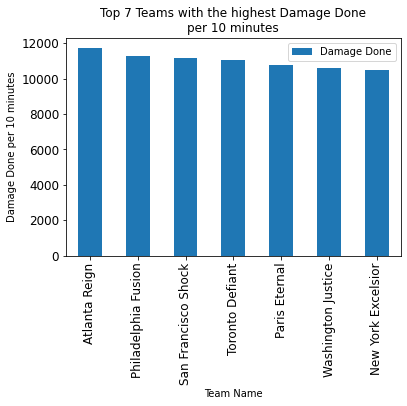

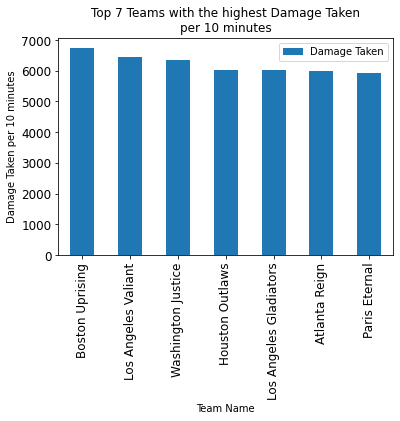

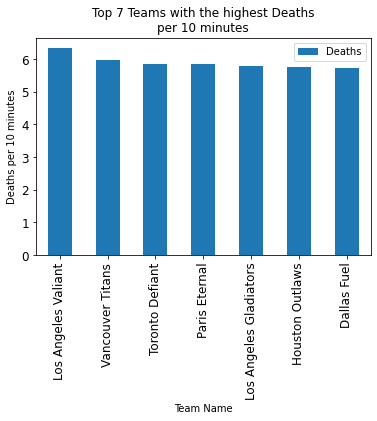

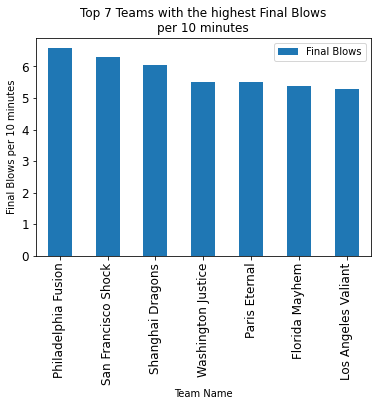

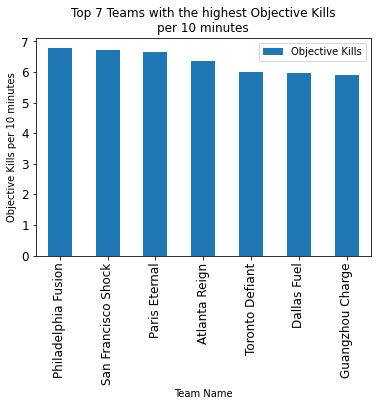

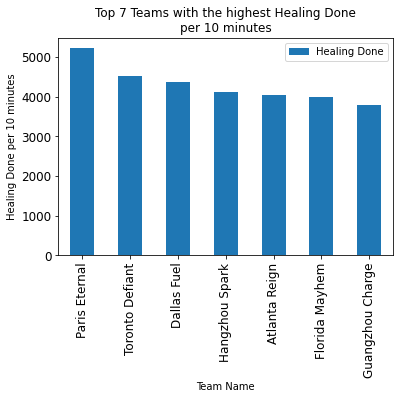

In [55]:
for stat in importantTotalStats:
    allTeamStats = pd.DataFrame()
    for team in teamNames:
        allTeamStats = allTeamStats.append(getTeamStat(team, stat))
    if stat == "All Damage Done":
        localName = "Damage Done"
    else:
        localName = stat
    allTeamStats.rename(columns={stat:localName}, inplace = True)
    allTeamStats = allTeamStats.sort_values(by=[localName], ascending = False)
    allTeamStats = allTeamStats.iloc[0:7]
    allTeamStats.plot(kind='bar', xlabel = "Team Name", ylabel = localName + " per 10 minutes", title = "Top 7 Teams with the highest " + localName + "\nper 10 minutes", fontsize = 12)
